In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel


In [81]:
info=pd.read_csv("лаб3/Books_rating.csv",header=0, nrows=10000)
info1 = info
data_without_nan1 = info.dropna()
info=data_without_nan1
user_reviews = info
info.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
10,0829814000,Wonderful Worship in Smaller Churches,19.40,AZ0IOBU20TBOP,Rev. Pamela Tinnin,8/10,5.0,991440000,Outstanding Resource for Small Church Pastors,"I just finished the book, &quot;Wonderful Wors..."
11,0829814000,Wonderful Worship in Smaller Churches,19.40,A373VVEU6Z9M0N,Dr. Terry W. Dorsett,1/1,5.0,1291766400,Small Churches CAN Have Wonderful Worship,Many small churches feel like they can not hav...
12,0829814000,Wonderful Worship in Smaller Churches,19.40,AGKGOH65VTRR4,"Cynthia L. Lajoy ""Cindy La Joy""",1/1,5.0,1248307200,Not Just for Pastors!,I just finished reading this amazing book and ...
13,0829814000,Wonderful Worship in Smaller Churches,19.40,A3OQWLU31BU1Y,Maxwell Grant,1/1,5.0,1222560000,Small church pastor? This is the book on worship,I hadn't been a small church pastor very long ...
14,0595344550,Whispers of the Wicked Saints,10.95,A3Q12RK71N74LB,Book Reader,7/11,1.0,1117065600,not good,I bought this book because I read some glowing...


In [82]:
#info.info()

In [83]:
info= info[['Id','User_id', 'review/score', 'review/text','Title']]
#info.head()

In [84]:
#!pip install scikit-surprise
from scipy.sparse import csr_matrix

from sklearn.model_selection import train_test_split
#trainset, testset = train_test_split(info, test_size=0.25, random_state=42)

id_mapping = {book: idx + 1 for idx, book in enumerate(info['User_id'].unique())}
id_mapping1 = {book: idx + 1 for idx, book in enumerate(info['Id'].unique())}

info = info.copy()

info['user_id'] = info['User_id'].map(id_mapping)
info = info.drop(columns = ['User_id'])
info['id'] = info['Id'].map(id_mapping1)
info = info.drop(columns = ['Id'])


In [85]:
info.reset_index(drop=True, inplace=True)

#info.info()

In [86]:
from surprise import Dataset, Reader, KNNBasic

reader = Reader(rating_scale=(1, 5))
# Создание объекта Dataset
data1 = info[['user_id', 'id', 'review/score']]
data = Dataset.load_from_df(data1, reader)


In [87]:
import timeit
from surprise.model_selection import train_test_split
start_time = timeit.default_timer()
trainset, testset = train_test_split(data, test_size=0.35, random_state=42)

# Создание и обучение модели
sim_options = {
    'name': 'msd',
    'user_based': True
}
model = KNNBasic(sim_options=sim_options)
model.fit(trainset)

target_user_id = 1  # для кого ищем

neighbors = model.get_neighbors(target_user_id, k=500)
end_time = timeit.default_timer()
ALL1 = end_time - start_time
print(f"Время выполнения: {ALL1} секунд")
print(f"Наиболее влияющие на пользователя {target_user_id} пользователи: {neighbors}")

Computing the msd similarity matrix...
Done computing similarity matrix.
Время выполнения: 0.015548448999993525 секунд
Наиболее влияющие на пользователя 1 пользователи: [51, 144, 190, 236, 264, 300, 375, 432, 438, 479, 560, 607, 662, 730, 174, 496, 534, 45, 456, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172

In [88]:
info[info['user_id'] == 10]
neighbors.append(1)

In [89]:
reverse_id_mapping1 = {v: k for k, v in id_mapping1.items()}
info['Id'] = info['id'].map(reverse_id_mapping1)


In [90]:
df0 = info.loc[info['user_id'] == 1]


In [91]:
df1 = info.loc[info['user_id'].isin(neighbors)]
df1

,review/score,review/text,Title,user_id,id,Id
0,5.0,"I just finished the book, &quot;Wonderful Wors...",Wonderful Worship in Smaller Churches,1,1,0829814000
1,5.0,Many small churches feel like they can not hav...,Wonderful Worship in Smaller Churches,2,1,0829814000
2,5.0,I just finished reading this amazing book and ...,Wonderful Worship in Smaller Churches,3,1,0829814000
3,5.0,I hadn't been a small church pastor very long ...,Wonderful Worship in Smaller Churches,4,1,0829814000
4,1.0,I bought this book because I read some glowing...,Whispers of the Wicked Saints,5,2,0595344550
...,...,...,...,...,...,...
970,5.0,"Expertly written by Paxton Quigly, ""Stayin' Al...",Stayin' Alive: Armed and Female in an Unsafe W...,66,141,0936783435
981,5.0,Michael J. Russ' Powerful Golf: Lower Your Gol...,Powerful Golf,66,142,0972023402
1052,5.0,"In 1936 Tidewater, Maryland Elizabeth ""Bette"" ...",Bette (Women of Ivy Manor Series #2),219,153,0786174994
1067,5.0,As I noted in my comments on Volume 1 of this ...,Reporting World War II Part Two: American Jour...,108,157,1883011051


In [92]:
#Wonderful Worship in Smaller Churches	
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527 entries, 0 to 1105
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review/score  527 non-null    float64
 1   review/text   527 non-null    object 
 2   Title         527 non-null    object 
 3   user_id       527 non-null    int64  
 4   id            527 non-null    int64  
 5   Id            527 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 28.8+ KB


In [93]:
tfidf = TfidfVectorizer(stop_words='english')
content = df1['review/text'].fillna('')

tfidf_matrix = tfidf.fit_transform(content)
from sklearn.metrics.pairwise import cosine_similarity

# Измерение косинусной близости между всеми парами документов
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [94]:
import numpy as np

top_n = 10  # из 20 выбираем 5 ближайших
recommendations = {}
for i in range(len(content)):
    sim_scores = list(enumerate(similarity_matrix[i]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    document_indices = [x[0] for x in sim_scores]
    recommendations[i] = document_indices

first_document_recommendations = recommendations[0][:top_n]
selected_rows = df1.iloc[first_document_recommendations]
selected_rows

,review/score,review/text,Title,user_id,id,Id
301,5.0,A &quot;must have&quot; for any legitimate per...,Thomas Paine : Collected Writings : Common Sen...,298,54,1883011035
3,5.0,I hadn't been a small church pastor very long ...,Wonderful Worship in Smaller Churches,4,1,0829814000
197,2.0,Let's face it: this isn't a very good book. Th...,Lost Cities of Africa and Arabia (The Lost Cit...,196,33,0932813062
501,5.0,A graceful and clear translation of the Holy B...,The New Revised Standard Version Bible with Ap...,489,83,0195283600
1,5.0,Many small churches feel like they can not hav...,Wonderful Worship in Smaller Churches,2,1,0829814000
195,4.0,"Ok, let's get one thing out of the way. David ...",Lost Cities of Africa and Arabia (The Lost Cit...,194,33,0932813062
504,5.0,I am very picky about the typography in my Bib...,The New Revised Standard Version Bible with Ap...,492,83,0195283600
221,5.0,Almost nothing can unsettle an aging baby boom...,The Great Memory Book,220,38,1890460044
395,1.0,"This book has a germ of an idea, but overall t...",The Organic Codes: An Introduction to Semantic...,386,63,0521531004
338,5.0,"At the height of The Age of Reason, The United...",Thomas Paine : Collected Writings : Common Sen...,334,54,1883011035


In [95]:
first_document_recommendations

[301, 3, 197, 501, 1, 195, 504, 221, 395, 338]

In [96]:
import timeit

start_time = timeit.default_timer()

tfidf = TfidfVectorizer(stop_words='english')
content = df1['review/text'].fillna('')

tfidf_matrix = tfidf.fit_transform(content)
from sklearn.metrics.pairwise import cosine_similarity

# Измерение косинусной близости между всеми парами документов
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)


end_time = timeit.default_timer()
ALL2 = end_time - start_time
print(f"Время выполнения: {ALL2} секунд")

Время выполнения: 0.0826969449999524 секунд


In [97]:
#similarity_matrix

In [98]:
#!pip install wordcloud

feature_names = tfidf.get_feature_names_out()
tf_scores = tfidf_matrix.toarray()[25]

sorted_w = [word for _, word in sorted(zip(tf_scores, feature_names), reverse = True)]
print("ключевые слова", sorted_w[:15])

ключевые слова ['loved', 'showed', 'revengeful', 'twisted', 'castle', 'realistic', 'glass', 'error', 'turned', 'loving', 'brilliant', 'human', 'writer', 'fact', 'god']


In [99]:
print(f"Время выполнения: {ALL1+ALL2} секунд")

Время выполнения: 0.09824539399994592 секунд


In [103]:
res = [0.09824, 0.13670, 0.13885, 0.17302]
times = [10000,15000,20000,25000]


res1 = [2.77132, 2.85484, 4.51864, 6.30538]
times1 = [10000,15000,20000,25000]

In [104]:
#0.03455876299994998 секунд 10000
#0.07819761399991876 секунд 15000
#0.07263122699987434 секунд 20000
#0.11225857699992048 секунд 25000

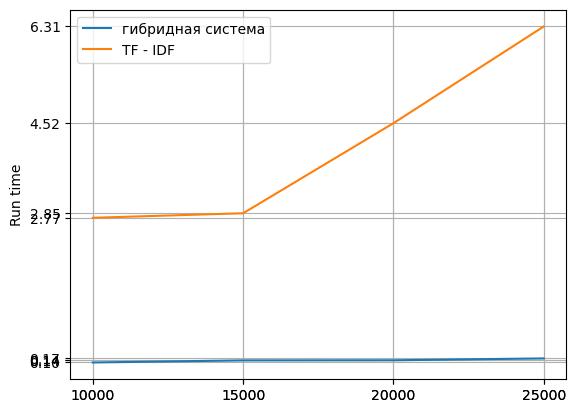

In [107]:
import matplotlib.pyplot as plt


plt.ylabel("Run time")
plt.plot(times, res, label='гибридная система')
plt.plot(times1, res1, label='TF - IDF')
plt.xticks(times + times1, [str(t) for t in times + times1])
plt.yticks(res + res1, [f"{r:.2f}" for r in res + res1])

plt.legend()
plt.grid(True)
plt.show()

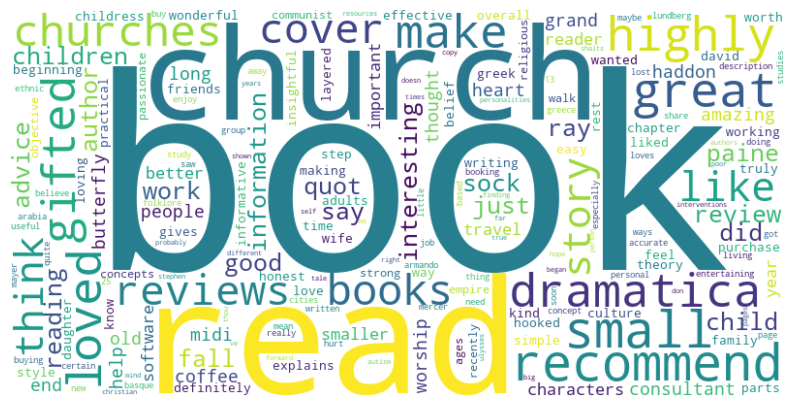

In [22]:
#!pip install wordcloud
import matplotlib.pyplot as plt

from wordcloud import WordCloud
feature_names = tfidf.get_feature_names_out()

# Получение TF-IDF значения для каждого слова в корпусе
tfidf_values = tfidf_matrix.sum(axis=0).A1

# Создание словаря слов и их TF-IDF значений
word_tfidf = dict(zip(feature_names, tfidf_values))

# Инициализация WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_tfidf)

# Отображение WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

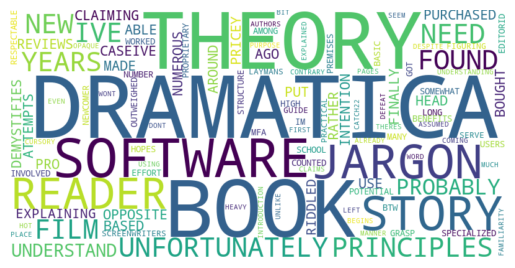

In [23]:
import string
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Пример текста


def gf(u):

    text = df1.iat[u, 1].upper()
    sp_s = string.punctuation
    text = "".join([s for s in text if s not in sp_s])
    text_tokens = word_tokenize(text)
    text = nltk.Text(text_tokens)

    sw = stopwords.words('english')
    text_tokens = [w for w in text_tokens if not w in sw]

    # Создание объекта FreqDist для подсчета частоты слов
    fd = FreqDist(text_tokens)

    # Создание облака слов
    wordcloud = WordCloud(width=800, height=400, background_color='white')
    wordcloud.generate_from_text(" ".join(text_tokens))

    # Отображение облака слов
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
##[1, 25, 16, 11, 26, 17, 23, 12, 18, 3]

    
gf(11)

In [27]:
id_mapping = {book: idx + 1 for idx, book in enumerate(info['Title'].unique())}
id_mapping1 = {book: idx + 1 for idx, book in enumerate(info['Id'].unique())}

info = info.copy()

#info['title'] = info['Title'].map(id_mapping)
#info = info.drop(columns = ['Title'])
info['id'] = info['Id'].map(id_mapping1)
info = info.drop(columns = ['Id'])


In [16]:
info.head()

,Id,review/score,review/text,title
10,0829814000,5.0,"I just finished the book, &quot;Wonderful Wors...",1
11,0829814000,5.0,Many small churches feel like they can not hav...,1
12,0829814000,5.0,I just finished reading this amazing book and ...,1
13,0829814000,5.0,I hadn't been a small church pastor very long ...,1
14,0595344550,1.0,I bought this book because I read some glowing...,2


In [20]:
info = info[['Id','title','review/score']]
info.head()

,Id,title,review/score
10,0829814000,1,5.0
11,0829814000,1,5.0
12,0829814000,1,5.0
13,0829814000,1,5.0
14,0595344550,2,1.0


In [25]:
#деление на тест и train
#!pip install scikit-surprise
from scipy.sparse import csr_matrix

from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(info, test_size=0.25, random_state=42)

info['Id'] = pd.to_numeric(info['Id'])
info['title'] = pd.to_numeric(info['title'])
sparse_matrix = csr_matrix((info['review/score'], (info['Id'], info['title'])))


ValueError: Unable to parse string "158322047X" at position 62

In [16]:
tfidf = TfidfVectorizer(stop_words='english')
content = data1['description'].fillna('')
#df['ID книги'] = df['Название книги'].map(id_mapping)

tfidf_matrix = tfidf.fit_transform(content)

In [17]:
content[5]

"In The Church of Christ: A Biblical Ecclesiology for Today, respected biblical scholar Everett Ferguson presents a genuine biblical theology of the church. By systematically examining the New Testament's teaching on the existence, meaning, and purpose of the church, providing responsible coverage of the traditional topics in ecclesiology, and carefully grounding ecclesiology in the person and work of Christ, Ferguson unveils a comprehensive model of the church that is both biblically centered and relevant to a world on the verge of the twenty-first century."

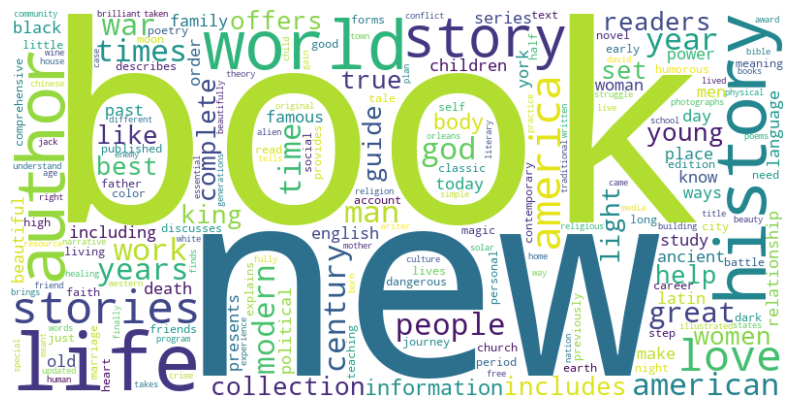

In [15]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)
import numpy as np
import matplotlib.pyplot as plt


# Пример: получение топ-N рекомендаций для каждого документа
top_n = 5

# Для каждого документа, получение топ-N схожих документов
recommendations = {}
for i in range(len(content)):
    sim_scores = list(enumerate(similarity_matrix[i]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    document_indices = [x[0] for x in sim_scores]
    recommendations[i] = document_indices
#!pip install wordcloud

from wordcloud import WordCloud
feature_names = tfidf.get_feature_names_out()

# Получение TF-IDF значения для каждого слова в корпусе
tfidf_values = tfidf_matrix.sum(axis=0).A1

# Создание словаря слов и их TF-IDF значений
word_tfidf = dict(zip(feature_names, tfidf_values))

# Инициализация WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_tfidf)

# Отображение WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

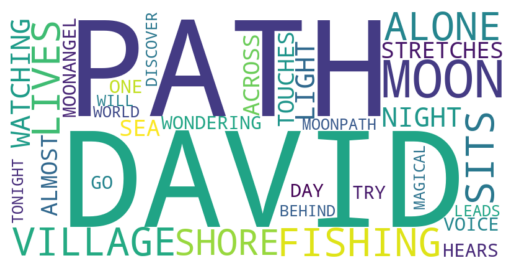

In [17]:
import string
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Пример текста


def gf(u):

    text = data1.iat[u, 1].upper()

    # Удаление знаков препинания
    sp_s = string.punctuation
    text = "".join([s for s in text if s not in sp_s])

    # Токенизация текста
    text_tokens = word_tokenize(text)
    text = nltk.Text(text_tokens)

    # Удаление стоп-слов
    sw = stopwords.words('english')
    text_tokens = [w for w in text_tokens if not w in sw]

    # Создание объекта FreqDist для подсчета частоты слов
    fd = FreqDist(text_tokens)

    # Создание облака слов
    wordcloud = WordCloud(width=800, height=400, background_color='white')
    wordcloud.generate_from_text(" ".join(text_tokens))

    # Отображение облака слов
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
##[312, 83, 96, 345, 511]
    
gf(15)

In [11]:
user_reviews_df = pd.DataFrame(user_reviews)
books_data_df = pd.DataFrame(books_data)

# Объединение данных по заголовкам книг
merged_data = pd.merge(user_reviews_df, books_data_df, on="Title", how="right")

# Создание персонализированной колонки с отзывами и рейтингами
merged_data["personalized_reviews"] = merged_data.apply(lambda row: f"{row['review/score']} " * int(row['ratingsCount']) if not pd.isna(row['ratingsCount']) else "", axis=1)

# Соберем все описания и персонализированные отзывы вместе
documents = merged_data["description"] + " " + merged_data["personalized_reviews"]

# TF-IDF векторизация с персонализированными весами
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Веса терминов для каждой книги
user_profile_weights = tfidf_matrix[:len(user_reviews)].toarray().sum(axis=0)  # Суммируем веса для отзывов пользователя
book_weights = tfidf_matrix[len(user_reviews):].toarray()

# Рассчитаем схожесть с персонализированными весами
similarities = pd.DataFrame(cosine_similarity(user_profile_weights.reshape(1, -1), book_weights).flatten(), columns=["Similarity"])

# Добавим колонку с именами книг
similarities["Book_Title"] = books_data_df["Title"]

# Ранжирование книг по убыванию схожести
recommendations = similarities.sort_values(by="Similarity", ascending=False)[["Book_Title", "Similarity"]]

# Вывод рекомендаций
print(recommendations)


                                           Book_Title  Similarity
27                                                NaN    0.304965
84                                                NaN    0.296564
58  No place to cry: The hurt and healing of sexua...    0.293937
80                                                NaN    0.292311
35                                                NaN    0.286542
..                                                ...         ...
42                            Tess and the Highlander    0.027710
55                                                NaN    0.027107
5   The Church of Christ: A Biblical Ecclesiology ...    0.025399
23                                                NaN    0.024106
54      Open marriage;: A new life style for couples,    0.021908

[85 rows x 2 columns]
